In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Upload purchase data file
from google.colab import files
uploaded_purchase = files.upload()

# Load purchase data
purchase_data = pd.read_excel(next(iter(uploaded_purchase.keys())))
print(purchase_data.columns)
purchase_data = purchase_data.rename(columns={"Credit": "Amount"})

# Upload sales data file
uploaded_sales = files.upload()

# Load sales data
sales_data = pd.read_excel(next(iter(uploaded_sales.keys())))
print(sales_data.columns)
sales_data = sales_data.rename(columns={"Debit": "Amount"})

Saving DayBook april purchase.xlsx to DayBook april purchase.xlsx
Index(['Date', 'Particulars', 'Credit'], dtype='object')


Saving DayBook arpil sale.xlsx to DayBook arpil sale.xlsx
Index(['Date', 'Particulars', 'Debit'], dtype='object')


Purchase Data Statistics:
             Amount
count  1.470000e+02
mean   4.551420e+05
std    3.785220e+05
min    2.400000e+01
25%    1.571140e+05
50%    3.772650e+05
75%    6.522500e+05
max    1.835050e+06

Sales Data Statistics:
             Amount
count  3.460000e+02
mean   2.019408e+05
std    3.115141e+05
min    2.500000e+01
25%    2.855000e+04
50%    5.157500e+04
75%    2.338022e+05
max    1.945149e+06
Columns Index(['Date', 'Particulars', 'Amount'], dtype='object')


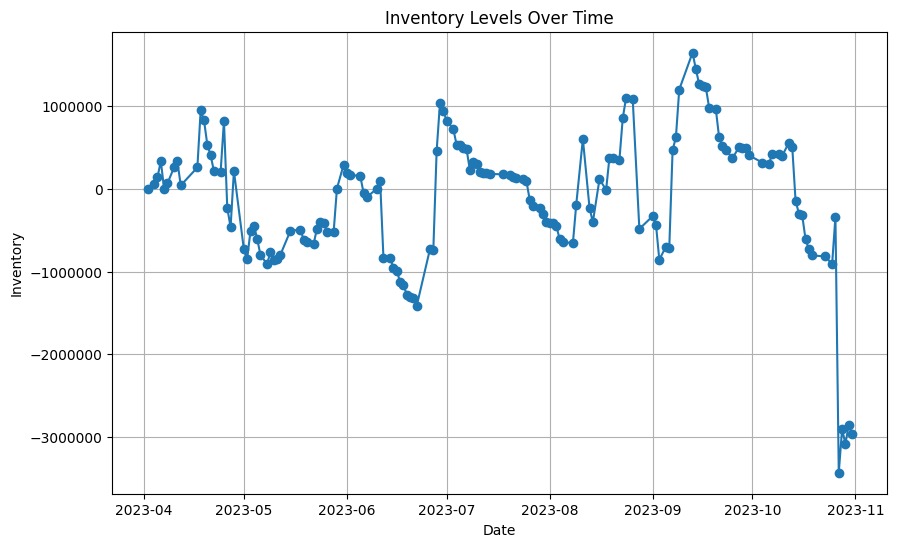

In [ ]:
# Data Preparation
# Assuming 'Date' column is already in datetime format

# Exploratory Data Analysis (EDA)
# Purchase data
purchase_stats = purchase_data.describe()
print("Purchase Data Statistics:")
print(purchase_stats)

# Sales data
sales_stats = sales_data.describe()
print("\nSales Data Statistics:")
print(sales_stats)

# Inventory Analysis
# Calculate inventory levels over time
print("Columns", purchase_data.columns)
purchase_data['Inventory Change'] = purchase_data['Amount']
sales_data['Inventory Change'] = -sales_data['Amount']

inventory_df = pd.concat([purchase_data[['Date', 'Inventory Change']],
                          sales_data[['Date', 'Inventory Change']]])

inventory_df = inventory_df.groupby('Date').sum().cumsum()

# Plot inventory levels over time
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.plot(inventory_df.index, inventory_df['Inventory Change'], marker='o', linestyle='-')
plt.title('Inventory Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Inventory')
plt.grid(True)
plt.show()

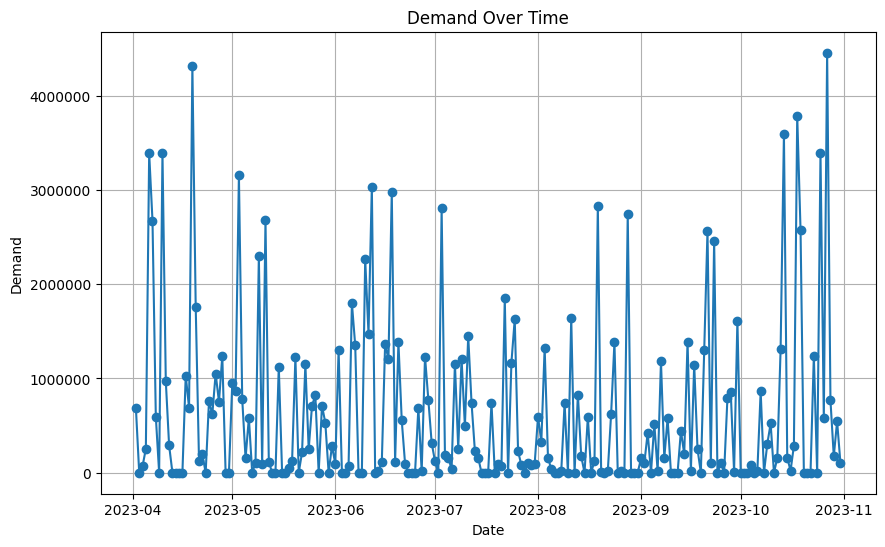

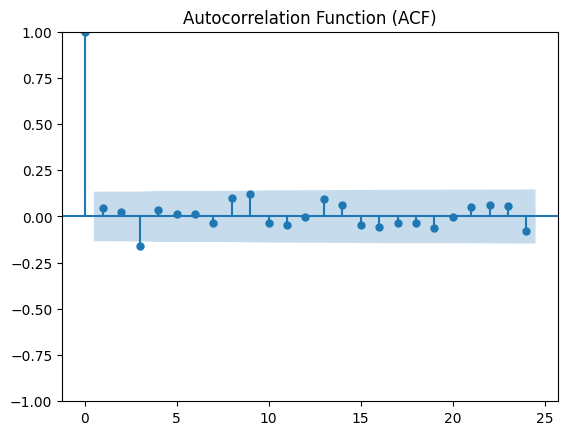

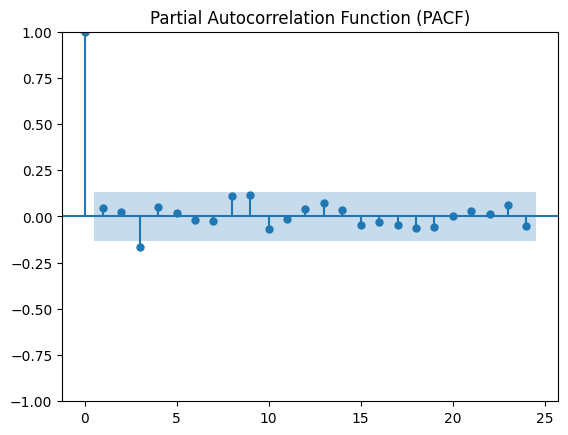

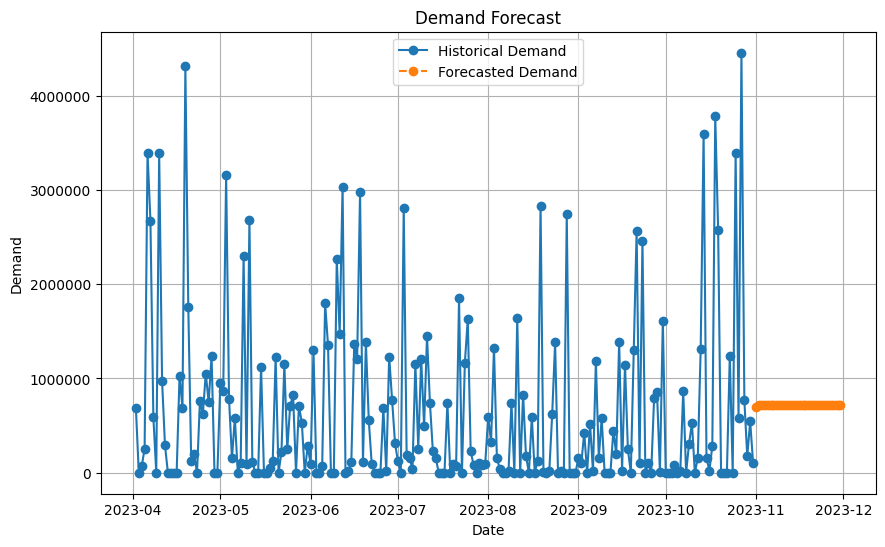

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Combine purchase and sales data
demand_data = pd.concat([purchase_data[['Date', 'Amount']], sales_data[['Date', 'Amount']]])

# Set 'Date' column as index
demand_data.set_index('Date', inplace=True)

# Resample the data to daily frequency and fill missing values with 0
demand_data = demand_data.resample('D').sum().fillna(0)

# Plot demand data
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.plot(demand_data.index, demand_data['Amount'], marker='o', linestyle='-')
plt.title('Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.grid(True)
plt.show()

# Check for stationarity
# You can use Augmented Dickey-Fuller (ADF) test or plot the autocorrelation function (ACF) and partial autocorrelation function (PACF)
# For simplicity, let's plot ACF and PACF
plot_acf(demand_data['Amount'])
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(demand_data['Amount'])
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Fit ARIMA model
# ARIMA(p, d, q) model requires three parameters: p (autoregressive), d (differencing), q (moving average)
# You can select these parameters based on ACF and PACF plots or using grid search
# For simplicity, let's use p=1, d=1, q=1
p, d, q = 1, 1, 1
model = ARIMA(demand_data['Amount'], order=(p, d, q))
model_fit = model.fit()

# Forecast future demand
n_forecast = 30  # Number of days to forecast
forecast = model_fit.forecast(steps=n_forecast)

# Plot forecasted demand
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.plot(demand_data.index, demand_data['Amount'], label='Historical Demand', marker='o', linestyle='-')
plt.plot(pd.date_range(start=demand_data.index[-1], periods=n_forecast+1)[1:], forecast, label='Forecasted Demand', marker='o', linestyle='--')
plt.title('Demand Forecast')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


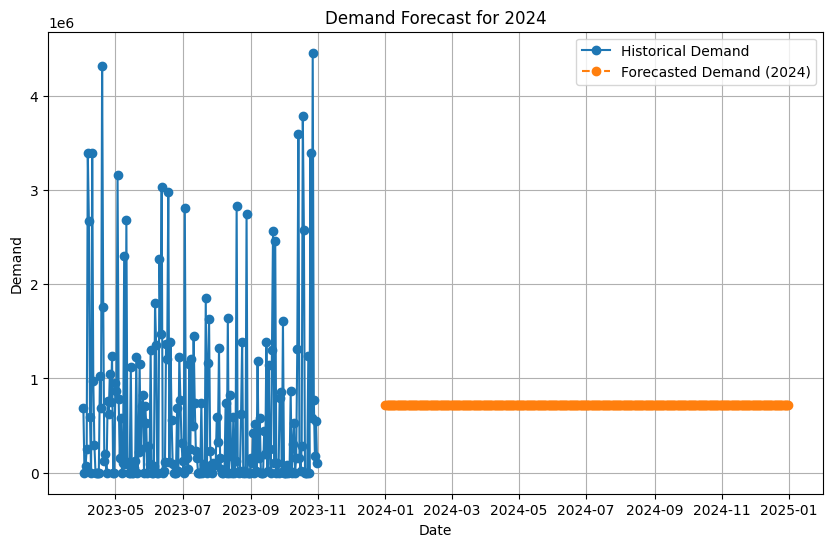

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Combine purchase and sales data
demand_data = pd.concat([purchase_data[['Date', 'Amount']], sales_data[['Date', 'Amount']]])

# Set 'Date' column as index
demand_data.set_index('Date', inplace=True)

# Resample the data to daily frequency and fill missing values with 0
demand_data = demand_data.resample('D').sum().fillna(0)

# Fit ARIMA model
p, d, q = 1, 1, 1  # Example parameters (you may need to adjust these)
model = ARIMA(demand_data['Amount'], order=(p, d, q))
model_fit = model.fit()

# Forecast sales for 2024
start_date_2024 = '2024-01-01'
end_date_2024 = '2024-12-31'
forecast = model_fit.predict(start=start_date_2024, end=end_date_2024, typ='levels')

# Plot forecasted sales for 2024
plt.figure(figsize=(10, 6))
plt.plot(demand_data.index, demand_data['Amount'], label='Historical Demand', marker='o', linestyle='-')
plt.plot(forecast.index, forecast, label='Forecasted Demand (2024)', marker='o', linestyle='--')
plt.title('Demand Forecast for 2024')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calculate demand rate (average demand per unit time)
demand_rate = demand_data['Amount'].mean()

# Define ordering cost per order (e.g., cost of placing an order)
ordering_cost = 500000# Example ordering cost per order

# Define holding cost per unit (e.g., cost of holding one unit of inventory per unit time)
holding_cost_per_unit = 2 # Example holding cost per unit per unit time

# Calculate EOQ (Economic Order Quantity)
EOQ = ((2 * demand_rate * ordering_cost) / holding_cost_per_unit) ** 0.5

# Calculate reorder point
# Reorder point = demand rate * lead time + safety stock
# Lead time is the time between placing an order and receiving it
lead_time = 7  # Example lead time (in days)
safety_stock = 0  # Example safety stock (additional buffer to account for variability in demand or lead time)

reorder_point = demand_rate * lead_time + safety_stock

# Print results
print("Economic Order Quantity (EOQ):", EOQ)
print("Reorder Point:", reorder_point)


Economic Order Quantity (EOQ): 566633.6270677409
Reorder Point: 4495031.342535212


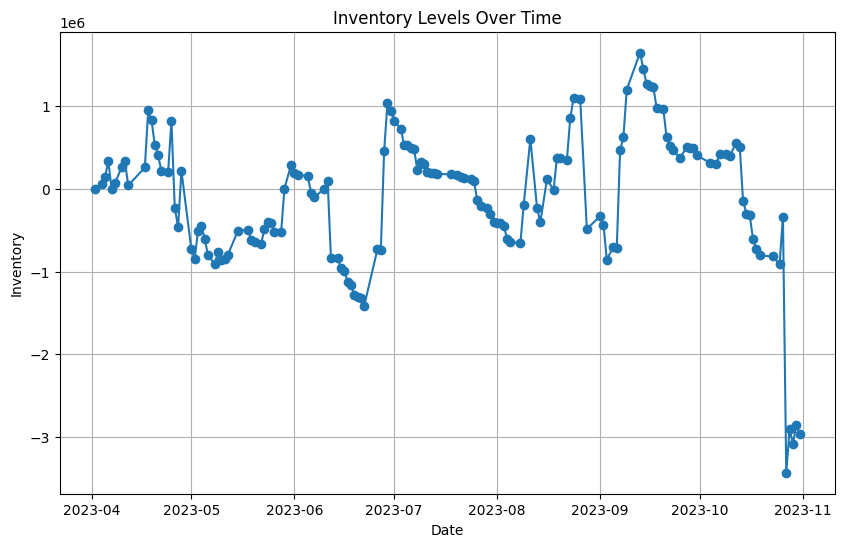

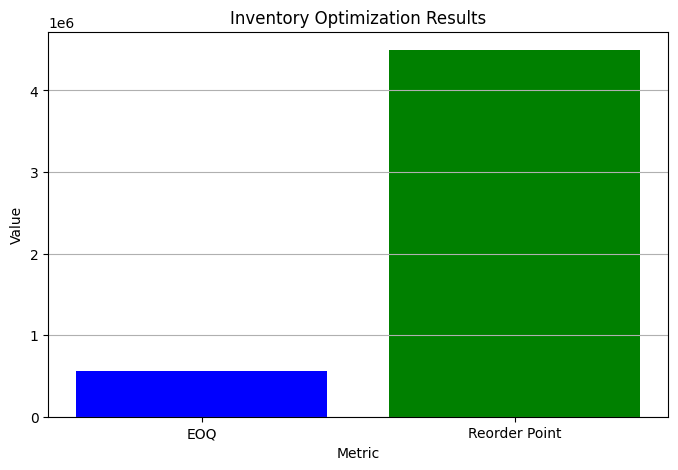

Summary Report:
1. Inventory Level Over Time:

2. Demand Forecasting:

3. Inventory Optimization Results:
- Economic Order Quantity (EOQ): 566633.6270677409
- Reorder Point: 4495031.342535212


In [ ]:
# 1. Inventory Level Over Time Visualization
plt.figure(figsize=(10, 6))
plt.plot(inventory_df.index, inventory_df['Inventory Change'], marker='o', linestyle='-')
plt.title('Inventory Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Inventory')
plt.grid(True)
plt.show()

# 2. Demand Forecasting Visualization (Already implemented)

# 3. Inventory Optimization Results Visualization
plt.figure(figsize=(8, 5))
plt.bar(['EOQ', 'Reorder Point'], [EOQ, reorder_point], color=['blue', 'green'])
plt.title('Inventory Optimization Results')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.grid(axis='y')
plt.show()

# 4. Summary Report
print("Summary Report:")
print("1. Inventory Level Over Time:")
# Add any relevant summary text here

print("\n2. Demand Forecasting:")
# Add any relevant summary text here

print("\n3. Inventory Optimization Results:")
print("- Economic Order Quantity (EOQ):", EOQ)
print("- Reorder Point:", reorder_point)

# You can add more sections to the summary report as needed
